## Imports and definitions

In [18]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [19]:
path = '/home/paperspace/kaggle/dog-breed-identification/data/dogscats'
sz = 224
bs = 64
arch = resnext101_64

## Data download and processing

In [3]:
!kg config -c dogs-vs-cats-redux-kernels-edition

In [8]:
!mkdir -p {path}

In [9]:
os.chdir(path)

In [10]:
!kg download

downloading https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/download/test.zip

test.zip 100% |#####################################| Time: 0:00:11  24.4 MiB/s

downloading https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/download/train.zip

train.zip 100% |####################################| Time: 0:00:21  25.2 MiB/s

downloading https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/download/sample_submission.csv

sample_submission.csv 100% |########################| Time: 0:00:00 303.0 KiB/s



In [ ]:
!unzip -qq {path}/train.zip
!mv train {path}

In [14]:
!mkdir -p {path}/train/cats
!mkdir -p {path}/train/dogs
!mv {path}/train/cat.* {path}/train/cats
!mv {path}/train/dog.* {path}/train/dogs

In [17]:
!mkdir -p {path}/valid
!mkdir -p {path}/valid/cats
!mkdir -p {path}/valid/dogs

In [12]:
os.chdir(path+'/train/dogs')
!shuf -n 500 -e * | xargs -i mv {} ../../valid/dogs
os.chdir(path+'/train/cats')
!shuf -n 500 -e * | xargs -i mv {} ../../valid/cats

In [14]:
os.chdir('/home/paperspace/kaggle/dog-breed-identification')

## Model training

In [20]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(path, tfms=tfms, bs=bs)

In [21]:
learn = ConvLearner.pretrained(arch, data, precompute=True, ps=0.5)

100%|██████████| 20/20 [00:17<00:00,  1.15it/s]


In [6]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 83%|████████▎ | 321/387 [00:09<00:01, 33.81it/s, loss=0.307] 


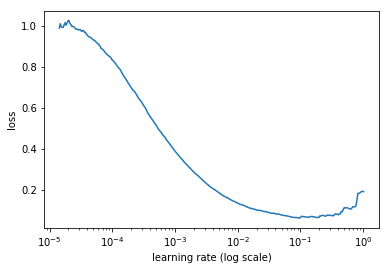

In [7]:
learn.sched.plot()

In [8]:
learn.fit(0.01, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.039926   0.019609   0.996875  
    1      0.02618    0.023655   0.996875                     
    2      0.019395   0.025445   0.996875                     
    3      0.02439    0.021845   0.996875                     
    4      0.018133   0.02713    0.996875                     
    5      0.01649    0.019054   0.996875                     
    6      0.025655   0.020454   0.996875                     



[0.02045429, 0.996875]

## Unfreeze and learn

In [9]:
learn.unfreeze()

In [10]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 71%|███████   | 273/387 [07:19<03:03,  1.61s/it, loss=0.0394]

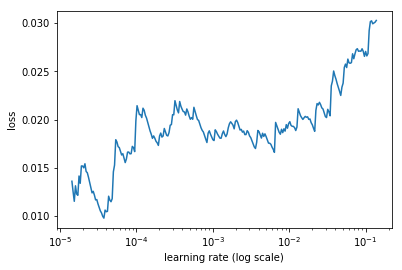

In [11]:
learn.sched.plot()